#### 前向传播代码复现

```text
          ┌────────────────────────┐
          │       1. 数据准备       │
          │   输入样本 (x_data, y_data) │
          └───────────┬────────────┘
                      │
                      ▼
          ┌────────────────────────┐
          │   2. 前向计算（模型预测） │
          │  y_pred = w * x + b    │
          │  （线性模型，前向传播） │
          └───────────┬────────────┘
                      │
                      ▼
          ┌────────────────────────┐
          │   3. 误差/损失计算       │
          │  单点误差 e = y - y_pred │
          │  总体误差 MSE = mean(e²)│
          └───────────┬────────────┘
                      │
          ┌───────────┴───────────────────────────┐
          ▼                                       ▼
┌────────────────────────┐          ┌─────────────────────────────┐
│ 4. 左图：拟合效果可视化 │          │ 5. 右图：损失函数可视化       │
│ 散点 + 拟合直线 + 误差线 │          │ L(w) = MSE(w) 曲线          │
│ 直观看当前 w 的拟合好坏 │          │ 看 w 的不同取值损失变化趋势 │
└────────────────────────┘          └─────────────────────────────┘

```


单点误差：[ 0.52 -0.12  0.78  0.98  0.58  1.28  0.18]
均方误差：0.551542857142857


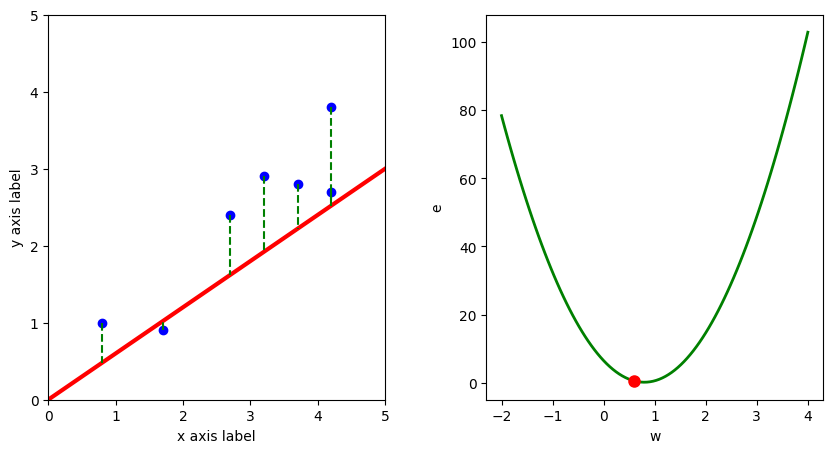

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 准备散点数据（模拟训练数据）
# 每一对 [x, y] 表示一个样本点：输入 x 和真实输出 y
data = [
    [0.8, 1.0],
    [1.7, 0.9],
    [2.7, 2.4],
    [3.2, 2.9],
    [3.7, 2.8],
    [4.2, 3.8],
    [4.2, 2.7],
]

# 将 Python 列表转换为 NumPy 数组，方便做数值运算
data = np.array(data)

# 从二维数组中分别取出 x 和 y
# data[:, 0] 表示所有行的第 0 列 → x 坐标
# data[:, 1] 表示所有行的第 1 列 → y 坐标（真实值）
x_data = data[:, 0]
y_data = data[:, 1]

# 2. 前向计算（用线性模型 y = w * x + b 做预测）

# 这里我们先假设一个模型参数（权重 w 和偏置 b）
# 注意：这不是通过训练得到的，而是人为指定，用来演示“损失”和“拟合效果”
w = 0.6
b = 0

# 根据线性模型 y = w * x + b 计算预测值
# 这一步就相当于“前向传播”：输入 x_data，输出 y_predicted
y_predicted = w * x_data + b  # 使用给定的 w 和 b 预测对应的 y 值

# 3. 误差计算（单点误差 + 均方误差）

# 单点误差：真实值 - 预测值
# e 中的每一个元素，都是一个样本点的“误差”
e = y_data - y_predicted
print(f"单点误差：{e}")

# 均方误差（MSE，Mean Squared Error）
# 公式： MSE = mean( (y_true - y_pred)^2 )
# 用来衡量整体拟合效果，值越小说明直线越贴近这些点
e_bar = np.mean((y_data - y_predicted) ** 2)
print(f"均方误差：{e_bar}")

# 4. 可视化：左图画拟合直线 + 数据点，右图画损失函数曲线

# 创建一个图像窗口（figure），大小为 10x5
fig = plt.figure(figsize=(10, 5))

# 在同一个 figure 中创建两个子图：
# 121 表示 1 行 2 列的第 1 个子图
# 122 表示 1 行 2 列的第 2 个子图
ax1 = fig.add_subplot(121)  # 左边：数据点 + 拟合直线
ax2 = fig.add_subplot(122)  # 右边：w 与损失之间的关系曲线

# 为绘制直线准备两个端点（x=0 和 x=5 对应的 y 值）
y_lower_lr = w * 0 + b  # 当 x = 0 时的预测 y
y_upper_lr = w * 5 + b  # 当 x = 5 时的预测 y

# 设置左图坐标轴范围
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 5)

# 设置左图的坐标轴标签
ax1.set_xlabel("x axis label")
ax1.set_ylabel("y axis label")

# 在左图中绘制真实散点
ax1.scatter(x_data, y_data, color="b")  # 蓝色点：训练数据

# 在左图中绘制当前 w, b 对应的拟合直线
# x 从 0 到 5，对应的 y 用上面的两个端点表示
ax1.plot([0, 5], [y_lower_lr, y_upper_lr], color="r", linewidth=3)

# 5. 右图：绘制损失函数随 w 变化的曲线

# 构造一组不同的 w 值，从 -2 到 4 等间距取 100 个
w_value = np.linspace(-2, 4, 100)

# 对每一个 w，计算对应的均方误差
# 注意：这里 b 固定为上面定义的 b（0）
loss_values = [
    np.mean((y_data - (w * x_data + b)) ** 2) for w in w_value  # 对应这个 w 的 MSE
]

# 在右图中绘制 w - 损失值 曲线
ax2.plot(w_value, loss_values, color="g", linewidth=2)

# 在损失曲线上标出当前使用的 w 的位置（红点），纵坐标就是 e_bar
ax2.plot(w, e_bar, marker="o", markersize=8, color="r")

# 设置右图坐标轴标签
ax2.set_xlabel("w")
ax2.set_ylabel("e")  # 这里 e 表示损失值（均方误差）

# 6. 在左图中画出每个点到拟合直线的“垂直误差线”

# 对每个样本点：画一条从真实点 (x, y_true) 到预测点 (x, y_pred) 的竖线
# 这条线的长度，就对应于“误差”的绝对值
# 这里画的是竖线，每条线之间不是完全相连，所以必须一条一条画
for x, y_true, y_pred in zip(x_data, y_data, y_predicted):
    ax1.plot([x, x], [y_true, y_pred], color="g", linestyle="--")

# 调整子图之间的水平间距
plt.subplots_adjust(wspace=0.3)

# 显示所有图像
plt.show()

#### 不包含画图的学习率与斜率法组合的反向传播模型


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 原始散点数据输入
#    每个点为 (x, y)，其中 x 为输入特征，y 为真实输出
data = [
    [0.8, 1.0],
    [1.7, 0.9],
    [2.7, 2.4],
    [3.2, 2.9],
    [3.7, 2.8],
    [4.2, 3.8],
    [4.2, 2.7]
]

# 将列表转为 NumPy 数组，便于进行向量化运算
data = np.array(data)

# 按列拆分：第一列是 x，第二列是 y
x_data = data[:, 0]
y_data = data[:, 1]


# 2. 定义损失函数（这里使用均方误差 MSE）
def loss_function(
    w,      # 线性模型的权重参数 weight
    b,      # 模型的偏置 bias
    x_data, # 输入特征
    y_data  # 真实标签
):
    # 使用线性模型 y = w*x + b 计算预测值
    y_predicted = w * x_data + b

    # 计算 MSE：样本误差平方的平均值
    e = np.mean((y_data - y_predicted)**2)

    # 返回当前参数下的损失
    return e


# 3. 初始化训练参数
w = 0  # 初始权重
b = 0  # 初始偏置（虽然本代码中没有更新 b，但保留结构）
lr = 0.01  # 学习率（learning rate）
w_old = w
b_old = b

# 迭代次数（训练多少轮）
num_iterations = 100

# 使用 for 循环进行参数更新
# range(1, num_iterations+1) 比 range(num_iterations) 更直观（从 1 开始）
for i in range(1, num_iterations + 1):

    # —— 前向传播：计算当前损失 ——
    tangent_loss = loss_function(w_old, b_old, x_data, y_data)

    # 打印每一轮训练的损失与当前 w，便于观察参数变化趋势
    print(f"iteration {i} | loss={tangent_loss:.6f} | w={w_old:.6f}")

    # —— 计算损失函数对 w 的斜率（也就是梯度 ∂Loss/∂w） ——
    # MSE(w) 推导公式所得：
    #   ∂/∂w MSE = -2 * mean(x*y) + 2*w * mean(x^2)
    tangent_slope = -2 * np.mean(x_data * y_data) + 2 * w_old * np.mean(x_data**2)

    # —— 使用梯度下降公式更新 w ——
    # w_new = w_old - lr * (梯度)
    w_new = w_old - lr * tangent_slope

    # 更新旧权重为新权重，进入下一次循环
    w_old = w_new


# —— 最终梯度计算（可选：展示最后一次的梯度值） ——
# 在机器学习中常用于调试
final_gradient = -2 * np.mean(x_data * y_data) + 2 * w_old * np.mean(x_data**2)
print("Final gradient:", final_gradient)


#### 包含画图的学习率与斜率法组合的反向传播模型

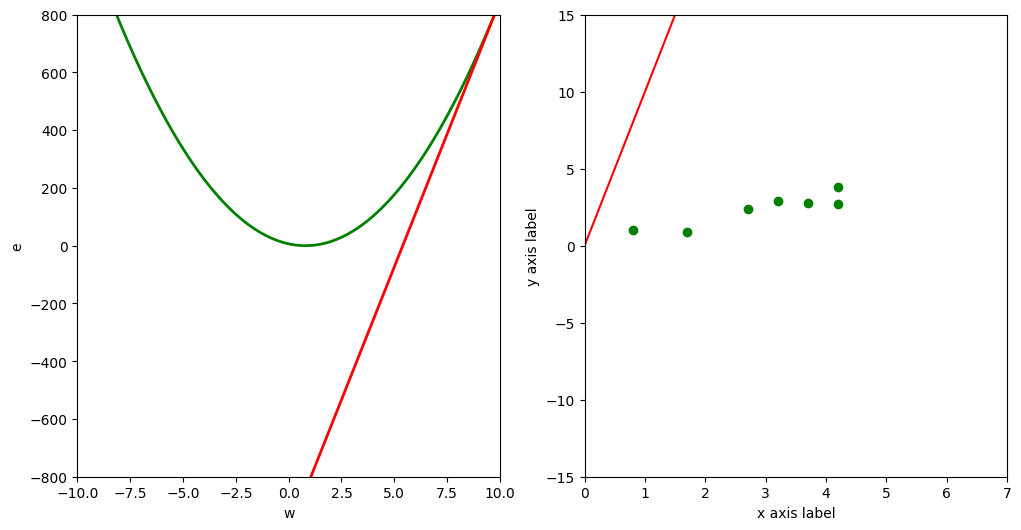

Final gradient: 3.711366680647643e-08


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 散点数据输入
# data 中每一项为一个二维点 [x, y]
data = [
    [0.8, 1.0],
    [1.7, 0.9],
    [2.7, 2.4],
    [3.2, 2.9],
    [3.7, 2.8],
    [4.2, 3.8],
    [4.2, 2.7]
]

# 转换为 NumPy 数组便于做向量计算
data = np.array(data)

# 拆分为输入 x_data（特征）与输出 y_data（真实值）
x_data = data[:, 0]
y_data = data[:, 1]


# 2. 定义损失函数 MSE（均方误差）
# MSE = mean((真实值 - 预测值)^2)
def loss_function(
        w,      # 权重（斜率）
        b,      # 偏置（截距）
        x_data, # 输入数据 x
        y_data  # 输出真实 y
    ):
    # 使用线性模型预测 y_hat = w*x + b
    y_predicted = w * x_data + b

    # 计算均方误差
    e = np.mean((y_data - y_predicted) ** 2)

    return e


# 3. 参数初始化
# 从一个较大的 w=10 开始，能更明显看到梯度下降的收敛过程
w = 10
b = 0

# 学习率（控制梯度下降步子的大小）
lr = 0.01

# 将 w、b 赋给可更新的变量
w_old = w
b_old = b

# 设置训练轮数
num_iterations = 100


# 创建可视化画布：两列图
# 左图：损失函数 E(w) 的曲线 + 切线
# 右图：散点 + 当前拟合直线 y = wx + b
fig, (ax1, ax2) = plt.subplots(
    1,      # 1 行
    2,      # 2 列
    figsize=(12, 6)  # 图像尺寸
)


# =======【开始迭代训练（梯度下降）】=======
for i in range(1, num_iterations + 1):

    # 每一轮都清空画布（用于动态展示）
    ax1.cla()
    ax2.cla()

    # 用等间距的 w 构造损失曲线 E(w)
    w_values = np.linspace(-10, 10, 200)
    loss_values = [loss_function(w1, b_old, x_data, y_data) for w1 in w_values]

    # 在左图画出 E(w) 曲线
    ax1.plot(w_values, loss_values, color='g', linewidth=2)

    # 当前 w 位置的损失值（红点）
    ax1.plot(
        w_old,
        loss_function(w_old, b_old, x_data, y_data),
        marker='o',
        markersize=8,
        color='r'
    )

    # 计算当前损失值（前向传播）
    tangent_loss = loss_function(w_old, b_old, x_data, y_data)

    # ===== 计算斜率（梯度） ∂Loss/∂w =====
    # 推导：d/dw MSE = -2*mean(x*y) + 2*w*mean(x^2)
    tangent_slople = -2 * np.mean(x_data * y_data) + 2 * w_old * np.mean(x_data ** 2)

    # ===== 绘制切线 =====
    # 切线方程： y = m*x + b
    # 当前 w 处的切线截距 = L(w) - slope*w
    tangent_intercept = tangent_loss - w_old * tangent_slople

    # 根据计算出的斜率与截距画出切线
    tangent_line = tangent_slople * w_values + tangent_intercept
    ax1.plot(w_values, tangent_line, color='r', linewidth=2)


    # ======= 右侧图 (散点 + 当前拟合直线) =======
    ax2.scatter(x_data, y_data, color='g')  # 散点图

    # 拟合直线 y = w*x + b，在 x=[0,7] 范围内画出来
    y_lower = w_old * 0 + b
    y_upper = w_old * 7 + b
    ax2.plot([0, 7], [y_lower, y_upper], color='r')

    ax2.set_xlim(0, 7)
    ax2.set_ylim(-15, 15)
    ax2.set_xlabel("x axis label")
    ax2.set_ylabel("y axis label")

    # ======= 参数更新（梯度下降）=======
    # w ← w - lr * ∂Loss/∂w
    w_old = w_old - lr * tangent_slople

    # 设置左图坐标范围
    ax1.set_xlim(-10, 10)
    ax1.set_ylim(-800, 800)
    ax1.set_xlabel("w")
    ax1.set_ylabel("e")

    # 暂停 0.01 秒，实现动态效果
    plt.pause(0.01)


# 最终梯度（debug 或展示用）
final_gradient = -2 * np.mean(x_data * y_data) + 2 * w_old * np.mean(x_data ** 2)
print("Final gradient:", final_gradient)


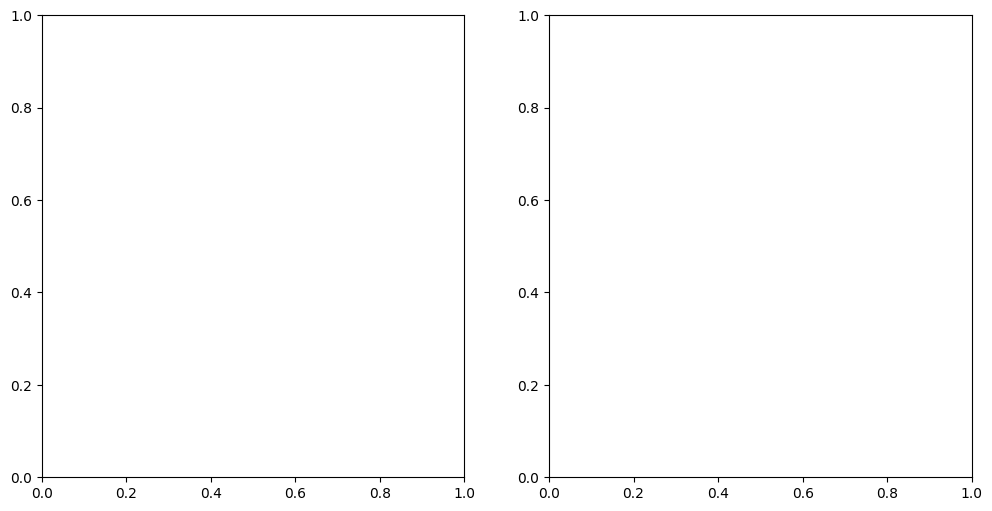

In [2]:
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
import time


def loss_function(w, b, x_data, y_data):
    """
    损失函数：均方误差（MSE）
    参数：
        w: 当前的权重（斜率）
        b: 当前的偏置（截距）
        x_data: 训练数据的自变量 x
        y_data: 训练数据的真实结果 y
    返回：
        e_bar: 在当前 w、b 下的均方误差
    """
    # 使用线性模型 y_hat = w * x + b 预测 y 的值
    y_predicted = w * x_data + b  # 使用训练得到的 w 和 b 预测 y 值

    # 计算均方误差 MSE = mean( (y_true - y_predicted)^2 )
    e_bar = np.mean((y_data - y_predicted) ** 2)
    return e_bar


# ===== 1. 定义输入数据 =====
# data 中每个元素是一个点 [x, y]
data = [
    [0.8, 1.0],
    [1.7, 0.9],
    [2.7, 2.4],
    [3.2, 2.9],
    [3.7, 2.8],
    [4.2, 3.8],
    [4.2, 2.7]
]

# 转换为 NumPy 数组，方便做向量化计算
data = np.array(data)

# 提取自变量 x_data 与因变量 y_data
x_data = data[:, 0]
y_data = data[:, 1]


# ===== 2. 初始化参数 =====
# 初始权重 w 和偏置 b
w = 0
b = 0

# 用于迭代更新的 w_old（作为当前 w 的值）
w_old = w

# 选项三中使用的小固定值（相当于学习率，lr 的作用）
min_fixed_value = 0.01

# 创建画布和两个子图
# fig: 整体图对象
# ax1: 左侧子图（损失函数 + 切线）
# ax2: 右侧子图（散点 + 拟合直线）
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# 为了画损失函数曲线，先构造一段 w 的取值范围
w_values = np.linspace(-10, 10, 200)  # w 取值范围

# 对每个 w 计算一次 MSE，得到损失函数曲线 E(w)
# 注意：这里的
